In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Importing the dataset
df = pd.read_csv('Restaurant_Reviews.tsv',delimiter = '\t')

In [5]:
df.head(20)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [6]:
df.shape

(1000, 2)

In [11]:
Text1 = ('my' , 'name' , 'is' , 'Angel')

In [13]:
' '.join(Text1)

'my name is Angel'

In [14]:
df['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [16]:
' '.join(df['Review'])

'Wow... Loved this place. Crust is not good. Not tasty and the texture was just nasty. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. Now I am getting angry and I want my damn pho. Honeslty it didn\'t taste THAT fresh.) The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. The fries were great too. A great touch. Service was very prompt. Would not go back. The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! I was disgusted because I was pretty sure that was human hair. I was shocked because no signs indicate cash only. Highly recommended. Waitress was a little slow in service. This place is not worth your time, let alone Vegas. did not like at all. The Burrittos Blah! The food, amazing. Service is also cute. I could care l

In [18]:
df['Liked'].value_counts()

0    500
1    500
Name: Liked, dtype: int64

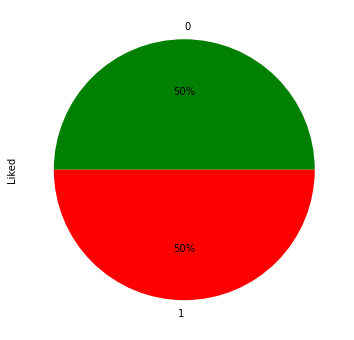

In [19]:
plt.figure(figsize=(8,6))
df['Liked'].value_counts().plot(kind = 'pie',autopct='%1.0f%%', colors =['green','red'])

plt.show()

In [21]:
# Dataset seems to be balanced liked and disliked 

# Most Used Words

In [22]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud , STOPWORDS

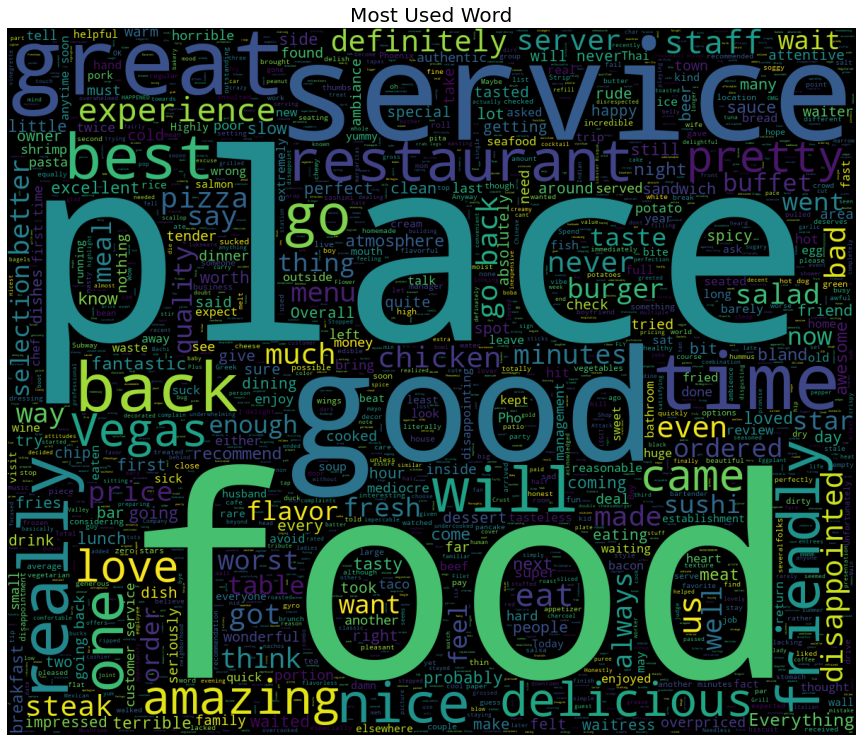

In [25]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color = 'black',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(df['Review'])) #join used for making them to a single string
plt.title("Most Used Word", fontsize=20)
plt.imshow(wordcloud.recolor(colormap= 'viridis'))
plt.axis('off')
plt.show()

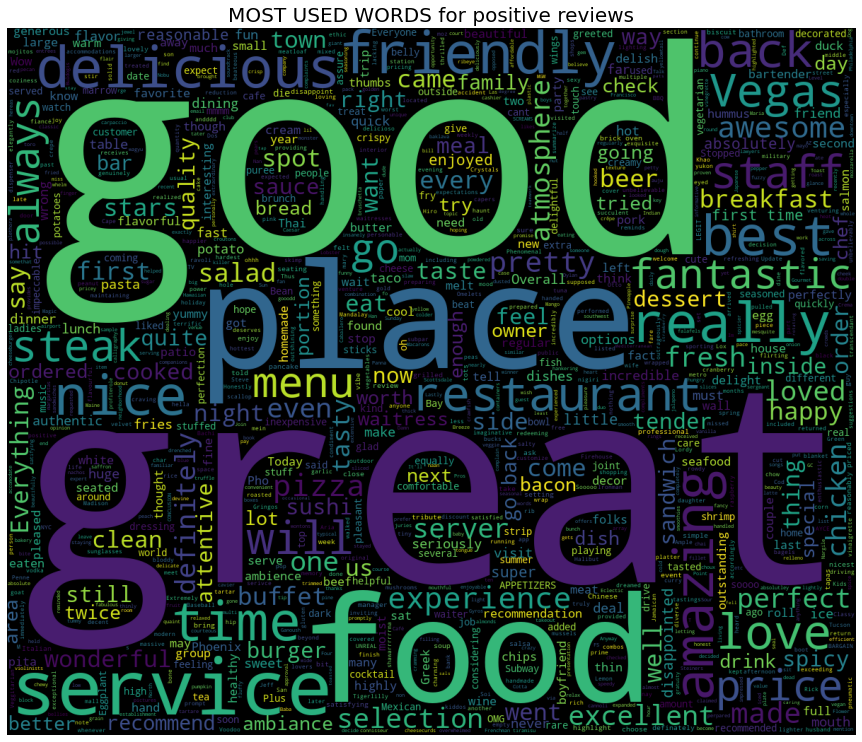

In [26]:
positive_reviews=df.loc[df['Liked']==1]['Review']
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(positive_reviews)) #join used for making them to a single string
plt.title("MOST USED WORDS for positive reviews",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

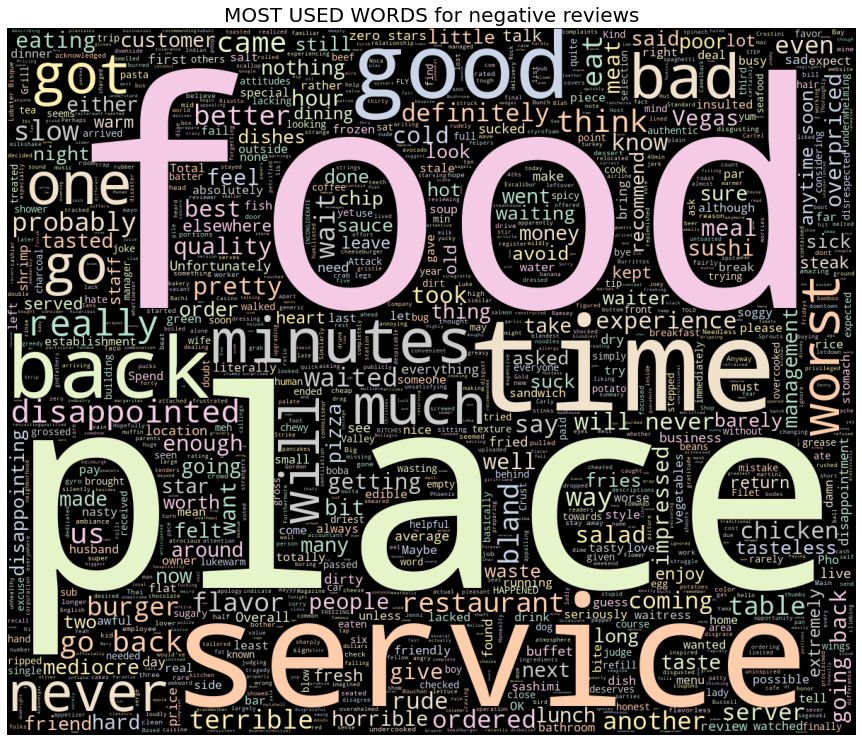

In [27]:
negative_reviews=df.loc[df['Liked']==0]['Review']
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(negative_reviews)) #join used for making them to a single string
plt.title("MOST USED WORDS for negative reviews",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'Pastel2'))
plt.axis('off')
plt.show()

#  preprocessing dataset

In [72]:
df.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [73]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [74]:
sample_text = 'The Restaurant is @ Amazing'
sample_text = sample_text.lower()
sample_text

'the restaurant is @ amazing'

In [75]:
sample_text = re.sub('[^a-zA-Z]', ' ', sample_text)
sample_text

'the restaurant is   amazing'

In [76]:
sample_text = sample_text.split()
sample_text

['the', 'restaurant', 'is', 'amazing']

In [63]:
import nltk

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANJALI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [77]:
ps = PorterStemmer()
sample_text = [ps.stem(word) for word in sample_text if not word in set(stopwords.words('english'))]
sample_text

['restaur', 'amaz']

In [78]:
sample_text = ' '.join(sample_text)
sample_text

'restaur amaz'

In [79]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    # re.sub is used to replace any word by any word . we will use this to replace any punctuation mark by space, 
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [80]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

### vectorization 

In [81]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [82]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

### training and classification

In [84]:
# Splitting the dataset into the Training set and Test set from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [85]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 83,  78],
       [ 17, 122]], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [87]:
accuracy = accuracy_score(y_test, classifier.predict(X_test).round())
recall = recall_score(y_test, classifier.predict(X_test).round())
precision = precision_score(y_test, classifier.predict(X_test).round())
f1score = f1_score(y_test, classifier.predict(X_test).round())
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1-Score:', f1score)

Accuracy: 0.6833333333333333
Recall: 0.8776978417266187
Precision: 0.61
F1-Score: 0.7197640117994101


In [88]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANJALI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [89]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANJALI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
import re
import nltk #for removing the stopforwards
# nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')

# Wordnet is an NLTK corpus reader, a lexical database for English. It can be used to find the meaning of words, synonym or 
# antonym. One can define it as a semantically oriented dictionary of English.

from nltk.stem import WordNetLemmatizer 

In [91]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [92]:
# from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bag_of_words = cv.fit_transform(corpus).toarray()
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
y = df.iloc[:,1].values

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size = 0.20, random_state = 1)

In [94]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[60, 48],
       [15, 77]], dtype=int64)

In [95]:
accuracy = accuracy_score(y_test, classifier.predict(X_test).round())
recall = recall_score(y_test, classifier.predict(X_test).round())
precision = precision_score(y_test, classifier.predict(X_test).round())
f1score = f1_score(y_test, classifier.predict(X_test).round())
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1-Score:', f1score)

Accuracy: 0.685
Recall: 0.8369565217391305
Precision: 0.616
F1-Score: 0.7096774193548386
